In [1206]:
# data
import pandas as pd
import numpy as np

#tests
from scipy import stats as st

#viz
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# для полноценной работы со строками мы уберем ограничение строк и столбцов в отображении
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [1207]:
# Цель проекта:

# 1. Определить на какой территории минимальный и максимальный процент безработных за весь период времени.
# 2. Проверить гипотезу: в каждой из возрастных категорий среднее значение занятых идентично средниму значению безработных
# 3. Проверить гипотезу: среднее значение безработных (в возрасте от 40 до 49 лет) в Брянской области одинаково со средним значением безработных возрасте до 20 лет
# 4. Проверить гипотеза: средний показатель безработицы в 2009 и 2019 году одинаков

In [1208]:
# План анализа данных:

# 1. Изучение общей информации
# 2. Предобработка данных
# 2.1. Проверка корректности наименований колонок;
# 2.2. Проверка и обработка пропущенных значений;
# 2.3. Проверка и обработка дубликатов;
# 2.4. Проверка и обработка типов данных;
# 3. Исследовательский анализ данных
# 3.1. Построение гистограммы с количеством безработных и занятых (общему количеству и по конкретной территории);
# 3.2. Определение на какой территории минимальный и максимальный процент безработных;
# 3.3. Вычислить среднее число безработных и занятых (по каждой территории)
# 3.4. Выделить ТОП-5 территорий по безработным и занятым
# 3.5. Построение столбчатой диаграммы с количеством занятых (по возрастным категориям)
# 3.6. Построение столбчатой диаграммы с количеством безработных (по возрастным категориям)
# 4. Проверка гипотез
# 4.1. Гипотеза: в каждой из возрастных категорий среднее значение занятых идентично среднему значению безработных
# 4.3. Гипотеза: среднее значение безработных (в возрасте от 40 до 49 лет) в Брянской области одинаково со средним значением безработных возрасте до 20 лет
# 4.4. Гипотеза: средний показатель безработицы в 2009 и 2019 одинаков
# 5. Дополнительная информация
# 5.1. Подготовка документации по библиотекам
# 6. Общий вывод

In [1209]:
df = pd.read_csv('data.csv')
df.head()

,territory,num_economactivepopulation_all,employed_num_all,unemployed_num_all,eactivity_lvl,employment_lvl,unemployment_lvl,dis_unagegroup_to20,dis_unagegroup_20-29,dis_unagegroup_30-39,dis_unagegroup_40-49,dis_unagegroup_50-59,dis_unagegroup_60older,dis_emagegroup_to20,dis_emagegroup_20-29,dis_emagegroup_30-39,dis_emagegroup_40-49,dis_emagegroup_50-59,dis_emagegroup_60older,num_unagegroup_to20,num_unagegroup_20-29,num_unagegroup_30-39,num_unagegroup_40-49,num_unagegroup_50-59,num_unagegroup_60older,num_emagegroup_to20,num_emagegroup_20-29,num_emagegroup_30-39,num_emagegroup_40-49,num_emagegroup_50-59,num_emagegroup_60older,year
0,Российская Федерация,70816.1,64400.1,6416.0,64.2,58.4,9.1,8.2,30.7,24.8,24.2,9.7,2.4,2.2,21.8,26.5,30.7,14.6,4.4,526.1,1969.7,1591.2,1552.7,622.4,154.0,1416.8,14039.2,17066.0,19770.8,9402.4,2833.6,2001
1,Центральный федеральный округ,18337.9,17181.9,1156.0,64.6,60.5,6.3,7.9,29.8,24.6,24.4,10.4,2.9,1.7,20.1,25.9,30.6,16.2,5.5,91.3,344.5,284.4,282.1,120.2,33.5,292.1,3453.6,4450.1,5257.7,2783.5,945.0,2001
2,Белгородская область,737.9,689.6,48.3,65.4,61.1,6.5,6.0,43.4,17.2,19.4,8.9,5.0,1.9,21.5,27.1,30.4,12.4,6.7,2.9,21.0,8.3,9.4,4.3,2.4,13.1,148.3,186.9,209.6,85.5,46.2,2001
3,Брянская область,653.5,588.1,65.3,61.0,54.9,10.0,5.9,33.3,28.0,23.6,8.2,1.0,2.8,23.1,27.1,30.7,12.4,3.9,3.9,21.7,18.3,15.4,5.4,0.7,16.5,135.9,159.4,180.5,72.9,22.9,2001
4,Владимирская область,808.9,728.4,80.5,65.4,58.9,9.9,13.2,32.4,21.4,25.0,5.0,3.1,2.3,21.6,25.7,30.4,15.4,4.6,10.6,26.1,17.2,20.1,4.0,2.5,16.8,157.3,187.2,221.4,112.2,33.5,2001


In [1210]:
df.shape

(831, 32)

In [1211]:
# Описание данных:

# territory - наименование территории по ОКАТО 
# num_economactivepopulation_all - численность экономически активного населения - всего 
# employed_num_all - занятые в экономике 
# unemployed_num_all - безработные 
# eactivity_lvl - уровень экономической активности 
# employment_lvl - уровень занятости 
# unemployment_lvl - уровень безработицы 
# dis_unagegroup_to20 - распределение безработных в возрасте до 20 лет по регионам РФ 
# dis_unagegroup_20-29 - распределение безработных в возрасте от 20 до 29 лет по регионам РФ 
# dis_unagegroup_30-39 - распределение безработных в возрасте от 30 до 39 лет по регионам РФ 
# dis_unagegroup_40-49 - распределение безработных в возрасте от 40 до 49 лет по регионам РФ 
# dis_unagegroup_50-59 - распределение безработных в возрасте от 50 до 59 лет по регионам РФ 
# dis_unagegroup_60older - распределение безработных в возрасте 60 и более лет по регионам РФ 
# dis_emagegroup_to20 - распределение занятых в экономике в возрасте до 20 лет по регионам РФ 
# dis_emagegroup_20-29 - распределение занятых в экономике в возрасте от 20 до 29 лет по регионам РФ 
# dis_emagegroup_30-39 - распределение занятых в экономике в возрасте от 30 до 39 лет по регионам РФ 
# dis_emagegroup_40-49 - распределение занятых в экономике в возрасте от 40 до 49 лет по регионам РФ 
# dis_emagegroup_50-59 - распределение занятых в экономике в возрасте от 50 до 59 лет по регионам РФ 
# dis_emagegroup_60older - распределение занятых в экономике в возрасте 60 и более лет по регионам РФ 
# num_unagegroup_to20 - численность безработных в возрасте до 20 лет по регионам РФ 
# num_unagegroup_20-29 - численность безработных в возрасте от 20 до 29 лет по регионам РФ 
# num_unagegroup_30-39 - численность безработных в возрасте от 30 до 39 лет по регионам РФ 
# num_unagegroup_40-49 - численность безработных в возрасте от 40 до 49 лет по регионам РФ 
# num_unagegroup_50-59 - численность безработных в возрасте от 50 до 59 лет по регионам РФ 
# num_unagegroup_60older - численность безработных в возрасте 60 и более лет по регионам РФ 
# num_emagegroup_to20 - численность занятых в экономике регионов РФ в возрасте до 20 лет 
# num_emagegroup_20-29 - численность занятых в экономике регионов РФ в возрасте от 20 до 29 лет 
# num_emagegroup_30-39 - численность занятых в экономике регионов РФ в возрасте от 30 до 39 лет 
# num_emagegroup_40-49 - численность занятых в экономике регионов РФ в возрасте от 40 до 49 лет 
# num_emagegroup_50-59 - численность занятых в экономике регионов РФ в возрасте от 50 до 59 лет 
# num_emagegroup_60older - численность занятых в экономике регионов РФ в возрасте 60 и более лет 
# year - отчетный год

In [1212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   territory                       831 non-null    object 
 1   num_economactivepopulation_all  829 non-null    float64
 2   employed_num_all                829 non-null    float64
 3   unemployed_num_all              829 non-null    float64
 4   eactivity_lvl                   829 non-null    float64
 5   employment_lvl                  829 non-null    float64
 6   unemployment_lvl                829 non-null    float64
 7   dis_unagegroup_to20             827 non-null    float64
 8   dis_unagegroup_20-29            829 non-null    float64
 9   dis_unagegroup_30-39            829 non-null    float64
 10  dis_unagegroup_40-49            829 non-null    float64
 11  dis_unagegroup_50-59            829 non-null    float64
 12  dis_unagegroup_60older          815 

In [1213]:
# Предобработка данных
# Проверка корректности наименований колонок.

In [1214]:
list(df.columns)

['territory',
 'num_economactivepopulation_all',
 'employed_num_all',
 'unemployed_num_all',
 'eactivity_lvl',
 'employment_lvl',
 'unemployment_lvl',
 'dis_unagegroup_to20',
 'dis_unagegroup_20-29',
 'dis_unagegroup_30-39',
 'dis_unagegroup_40-49',
 'dis_unagegroup_50-59',
 'dis_unagegroup_60older',
 'dis_emagegroup_to20',
 'dis_emagegroup_20-29',
 'dis_emagegroup_30-39',
 'dis_emagegroup_40-49',
 'dis_emagegroup_50-59',
 'dis_emagegroup_60older',
 'num_unagegroup_to20',
 'num_unagegroup_20-29',
 'num_unagegroup_30-39',
 'num_unagegroup_40-49',
 'num_unagegroup_50-59',
 'num_unagegroup_60older',
 'num_emagegroup_to20',
 'num_emagegroup_20-29',
 'num_emagegroup_30-39',
 'num_emagegroup_40-49',
 'num_emagegroup_50-59',
 'num_emagegroup_60older',
 'year']

In [1215]:
# df.rename(columns = {
#     'territory' : 'Территория',
#     'num_economactivepopulation_all' : 'Численность населения',
#     'employed_num_all' : 'Занятые в экономике',
#     'unemployed_num_all' : 'Безработные',
#     'eactivity_lvl' : 'Уровень экономической активности',
#     'employment_lvl' : 'Уровень занятости',
#     'unemployment_lvl' : 'Уровень безработицы',
#     'dis_unagegroup_to20' : 'Распределение безработных (до 20 лет)',
#     'dis_unagegroup_20-29' : 'Распределение безработных (от 20 до 29 лет)',
#     'dis_unagegroup_30-39' : 'Распределение безработных (от 30 до 39 лет)',
#     'dis_unagegroup_40-49' : 'Распределение безработных (от 40 до 49 лет)',
#     'dis_unagegroup_50-59' : 'Распределение безработных (от 50 до 59 лет)',
#     'dis_unagegroup_60older' : 'Распределение безработных (60 и более лет)',
#     'dis_emagegroup_to20' : 'Распределение занятых (до 20 лет)',
#     'dis_emagegroup_20-29' : 'Распределение занятых (от 20 до 29 лет)',
#     'dis_emagegroup_30-39' : 'Распределение занятых (от 30 до 39 лет)',
#     'dis_emagegroup_40-49' : 'Распределение занятых (от 40 до 49 лет)',
#     'dis_emagegroup_50-59' : 'Распределение занятых (от 50 до 59 лет)',
#     'dis_emagegroup_60older' : 'Распределение занятых (60 и более лет)',
#     'num_unagegroup_to20' : 'Численность безработных (до 20 лет)',
#     'num_unagegroup_20-29' : 'Численность безработных (от 20 до 29 лет)',
#     'num_unagegroup_30-39' : 'Численность безработных (от 30 до 39 лет)',
#     'num_unagegroup_40-49' : 'Численность безработных (от 40 до 49 лет)',
#     'num_unagegroup_50-59' : 'Численность безработных (от 50 до 59 лет)',
#     'num_unagegroup_60older' : 'Численность безработных (60 и более лет)',
#     'num_emagegroup_to20' : 'Численность занятых (до 20 лет)',
#     'num_emagegroup_20-29' : 'Численность занятых (от 20 до 29 лет)',
#     'num_emagegroup_30-39' : 'Численность занятых (от 30 до 39 лет)',
#     'num_emagegroup_40-49' : 'Численность занятых (от 40 до 49 лет)',
#     'num_emagegroup_50-59' : 'Численность занятых (от 50 до 59 лет)',
#     'num_emagegroup_60older' : 'Численность занятых (60 и более лет)',
#     'year' : 'Год',
# }, inplace = True)

In [1216]:
# проверка наличия данных всех годов (2001 - 2019гг.) для каждого субъекта:

In [1217]:
df['territory'].nunique()

105

In [1218]:
df['territory'].unique().tolist()

['Российская Федерация',
 'Центральный федеральный округ',
 'Белгородская область',
 'Брянская область',
 'Владимирская область',
 'Воронежская область',
 'Ивановская область',
 'Калужская область',
 'Костромская область',
 'Курская область',
 'Липецкая область',
 'Московская область',
 'Орловская область',
 'Рязанская область',
 'Смоленская область',
 'Тамбовская область',
 'Тверская область',
 'Тульская область',
 'Ярославская область',
 'г. Москва',
 'Северо-Западный федеральный округ',
 'Республика Карелия',
 'Республика Коми',
 'Архангельская область',
 'Ненецкий автономный округ',
 'Вологодская область',
 'Калининградская область',
 'Ленинградская область',
 'Мурманская область',
 'Новгородская область',
 'Псковская область',
 'г. Санкт-Петербург',
 'Южный федеральный округ',
 'Республика Адыгея',
 'Республика Дагестан',
 'Республика Ингушетия',
 'Кабардино-Балкарская Республика',
 'Республика Калмыкия',
 'Карачаево-Черкесская Республика',
 'Республика Северная Осетия - Алания',


In [1219]:
df_year_count = df.groupby('territory')['year'].nunique().to_frame().rename(columns={'year':'year_count'}).sort_values('year_count',ascending=True)
df_year_count

,year_count
territory,
Кабардино-Балкарская Республика,1
Карачаево-Черкесская Республика,1
Крымский федеральный округ,1
Сибирский федеральный округ,1
Центральный федеральный округ,1
Пермская область,2
Республика Адыгея (Адыгея),2
Камчатская область,2
Читинская область,3


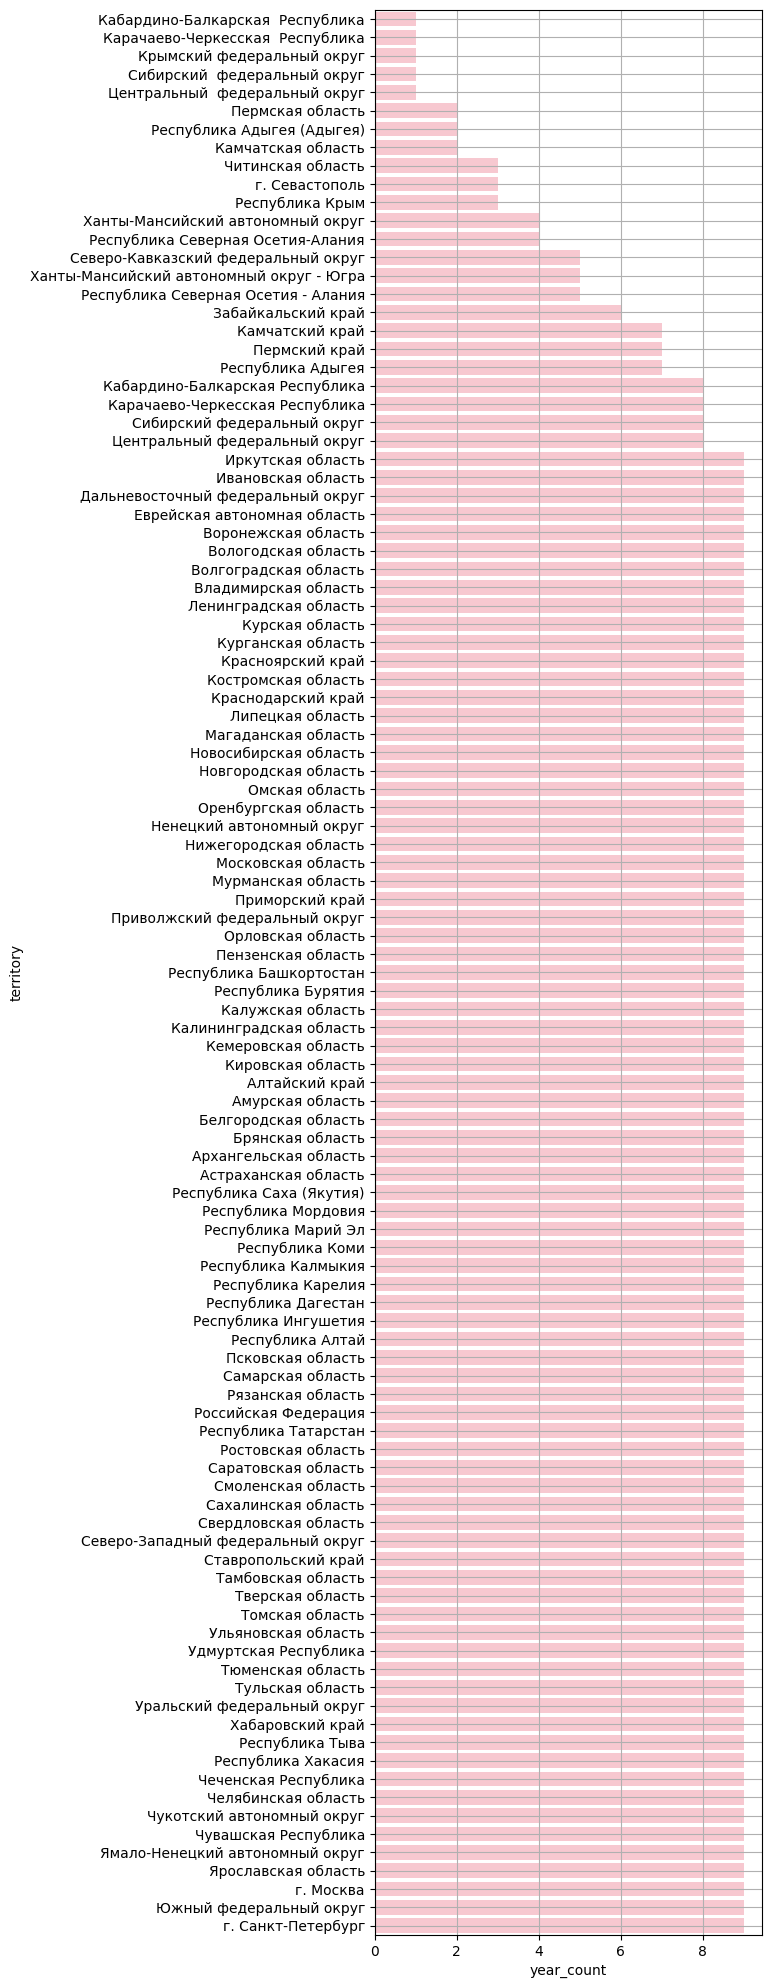

In [1220]:
plt.figure(figsize=(5, 25))
sns.barplot(data=df_year_count, x = 'year_count',y = 'territory',orient = 'h', color = 'pink')
plt.grid()

In [1221]:
# согласно полученным данным - наблюдаем 105 отдельных субьектов РФ / требуется соотнести данные таблицы с реальными данными по субъектам РФ (выполнить дополнительно)

In [1222]:
df_year_count_small = df.groupby('territory')['year'].nunique().to_frame().rename(columns={'year':'year_count'}).query('year_count != 9').sort_values('year_count',ascending=False).reset_index()
df_year_count_small.sort_values('territory')

,territory,year_count
7,Забайкальский край,6
19,Кабардино-Балкарская Республика,1
0,Кабардино-Балкарская Республика,8
18,Камчатская область,2
6,Камчатский край,7
21,Карачаево-Черкесская Республика,1
1,Карачаево-Черкесская Республика,8
20,Крымский федеральный округ,1
16,Пермская область,2
5,Пермский край,7


In [1223]:
df_year_count_small['territory'].to_list()

['Кабардино-Балкарская Республика',
 'Карачаево-Черкесская Республика',
 'Сибирский федеральный округ',
 'Центральный федеральный округ',
 'Республика Адыгея',
 'Пермский край',
 'Камчатский край',
 'Забайкальский край',
 'Северо-Кавказский федеральный округ',
 'Ханты-Мансийский автономный округ - Югра',
 'Республика Северная Осетия - Алания',
 'Республика Северная Осетия-Алания',
 'Ханты-Мансийский автономный округ',
 'г. Севастополь',
 'Республика Крым',
 'Читинская область',
 'Пермская область',
 'Республика Адыгея (Адыгея)',
 'Камчатская область',
 'Кабардино-Балкарская  Республика',
 'Крымский федеральный округ',
 'Карачаево-Черкесская  Республика',
 'Сибирский  федеральный округ',
 'Центральный  федеральный округ']

In [1224]:
# по результату выполненной проверки количества годов исследования для различных суъектов РФ - выявлено 3 закономерности:
# - с наибольшей долей вероятности - Забайкальский край и Читанская область - область одного рассчета с разными названиями.
# - с наибольшей долей вероятности - Кабардино-Балкарская республика и Кабардино-Балкарская республика - область одного рассчета с разными названиями.
# - с наибольшей долей вероятности - Карачаево-Черкесская республика и Карачаево-Черкесская республика - область одного рассчета с разными названиями.  
# - с наибольшей долей вероятности - Камчатская область и Камчатский край - область одного рассчета с разными названиями.
# - с наибольшей долей вероятности - Пермская область + Пермский край - область одного рассчета с разными названиями.
# - с наибольшей долей вероятности - Крымский федеральный округ и Республика Крым - область одного рассчета с разными названиями.
# - с наибольшей долей вероятности - Республица Адыгея + Республица Адыгея (Адыгея) - область одного рассчета с разными названиями.
# - с наибольшей долей вероятности - Республика Северная Осветия-Алания + Республика Северная Осветия - Алания - область одного рассчета с разными названиями.
# - с наибольшей долей вероятности - Сибирскаий федеральный округ + Сибирскаий федеральный округ - область одного рассчета с разными названиями.
# - с наибольшей долей вероятности - Ханты-Мансийский автономный округ + Ханты-Мансийский автономный округ - Югра - область одного рассчета с разными названиями.
# - с наибольшей долей вероятности - Центральный федеральный округ + Центральный федеральный округ - область одного рассчета с разными названиями.

# выполним доп. проверки для фиксации / наблюдений


In [1225]:
df.query('territory == "Забайкальский край" or territory == "Читинская область"')[['territory','year','num_economactivepopulation_all']] # проблема в разных наименованиях.

,territory,year,num_economactivepopulation_all
80,Читинская область,2001,543.5
171,Читинская область,2004,518.7
262,Читинская область,2007,536.5
347,Забайкальский край,2009,548.7
439,Забайкальский край,2012,531.9
531,Забайкальский край,2013,535.4
623,Забайкальский край,2015,535.7
720,Забайкальский край,2017,534.7
822,Забайкальский край,2019,525.4


In [1226]:
df.query('territory == "Кабардино-Балкарская  Республика" or territory == "Кабардино-Балкарская Республика"')[['territory','year','num_economactivepopulation_all']] # проблема в количестве пробелов между наименованиями.

,territory,year,num_economactivepopulation_all
36,Кабардино-Балкарская Республика,2001,321.3
127,Кабардино-Балкарская Республика,2004,385.6
218,Кабардино-Балкарская Республика,2007,426.6
309,Кабардино-Балкарская Республика,2009,412.0
406,Кабардино-Балкарская Республика,2012,384.7
498,Кабардино-Балкарская Республика,2013,422.7
590,Кабардино-Балкарская Республика,2015,427.1
687,Кабардино-Балкарская Республика,2017,433.2
781,Кабардино-Балкарская Республика,2019,446.4


In [1227]:
df.query('territory == "Карачаево-Черкесская Республика" or territory == "Карачаево-Черкесская  Республика"')[['territory','year','num_economactivepopulation_all']] # проблема в количестве пробелов между наименованиями.

,territory,year,num_economactivepopulation_all
38,Карачаево-Черкесская Республика,2001,184.8
129,Карачаево-Черкесская Республика,2004,184.6
220,Карачаево-Черкесская Республика,2007,210.0
311,Карачаево-Черкесская Республика,2009,214.4
407,Карачаево-Черкесская Республика,2012,237.7
499,Карачаево-Черкесская Республика,2013,225.3
591,Карачаево-Черкесская Республика,2015,217.4
688,Карачаево-Черкесская Республика,2017,209.7
782,Карачаево-Черкесская Республика,2019,203.6


In [1228]:
df.query('territory == "Камчатская область" or territory == "Камчатский край"')[['territory','year','num_economactivepopulation_all']] # проблема в разных наименованиях.

,territory,year,num_economactivepopulation_all
86,Камчатская область,2001,232.0
177,Камчатская область,2004,206.4
268,Камчатский край,2007,208.4
359,Камчатский край,2009,206.0
448,Камчатский край,2012,187.6
540,Камчатский край,2013,190.2
632,Камчатский край,2015,188.9
729,Камчатский край,2017,178.8
823,Камчатский край,2019,181.7


In [1229]:
df.query('territory == "Пермская область" or territory == "Пермский край"')[['territory','year','num_economactivepopulation_all']] # проблема в разных наименованиях.

,territory,year,num_economactivepopulation_all
57,Пермская область,2001,1478.5
148,Пермская область,2004,1446.8
239,Пермский край,2007,1436.1
330,Пермский край,2009,1448.8
418,Пермский край,2012,1357.6
510,Пермский край,2013,1336.7
602,Пермский край,2015,1304.7
699,Пермский край,2017,1280.2
793,Пермский край,2019,1225.0


In [1230]:
df.query('territory == "Крымский федеральный округ" or territory == "Республика Крым"')[['territory','year','num_economactivepopulation_all']] # проблема в разных наименованиях.

,territory,year,num_economactivepopulation_all
640,Крымский федеральный округ,2015,1163.0
641,Республика Крым,2015,964.0
678,Республика Крым,2017,915.5
772,Республика Крым,2019,918.0


In [1231]:
# По факту Крымский федеральный округ - Республика Крым + г. Севастополь / судя по данным представленным в таблице мы наблюдаем значения за 3 года (2015/2017/2019) отдельно для Р.Крым и для города Севастополь.and
# Поэтому удалим строчку Крымский федеральный округ / 

In [1232]:
# удалим строку 'Крымский федеральный округ' /
df = df.query('territory != "Крымский федеральный округ"')

In [1233]:
df.query('territory == "г.Севастополь" or territory == "г. Севастополь"')[['territory','year','num_economactivepopulation_all']] 

,territory,year,num_economactivepopulation_all
642,г. Севастополь,2015,199.0
683,г. Севастополь,2017,202.0
777,г. Севастополь,2019,222.1


In [1234]:
df.query('territory == "Республика Адыгея (Адыгея)" or territory == "Республика Адыгея"')[['territory','year','num_economactivepopulation_all']] # проблема в разных наименованиях.

,territory,year,num_economactivepopulation_all
33,Республика Адыгея,2001,197.9
124,Республика Адыгея,2004,189.7
215,Республика Адыгея,2007,209.6
306,Республика Адыгея,2009,203.0
397,Республика Адыгея,2012,204.2
489,Республика Адыгея (Адыгея),2013,210.0
581,Республика Адыгея (Адыгея),2015,201.8
676,Республика Адыгея,2017,200.1
770,Республика Адыгея,2019,200.6


In [1235]:
df.query('territory == "Республика Северная Осетия-Алания" or territory == "Республика Северная Осетия - Алания"')[['territory','year','num_economactivepopulation_all']] # проблема в разных наименованиях.

,territory,year,num_economactivepopulation_all
39,Республика Северная Осетия - Алания,2001,343.0
130,Республика Северная Осетия - Алания,2004,330.3
221,Республика Северная Осетия - Алания,2007,315.7
312,Республика Северная Осетия - Алания,2009,365.3
408,Республика Северная Осетия - Алания,2012,351.7
500,Республика Северная Осетия-Алания,2013,344.9
592,Республика Северная Осетия-Алания,2015,328.9
689,Республика Северная Осетия-Алания,2017,333.1
783,Республика Северная Осетия-Алания,2019,310.8


In [1236]:
df.query('territory == "Сибирский федеральный округ" or territory == "Сибирский  федеральный округ"')[['territory','year','num_economactivepopulation_all']] # проблема в количестве пробелов между наименованиями.

,territory,year,num_economactivepopulation_all
68,Сибирский федеральный округ,2001,9874.3
159,Сибирский федеральный округ,2004,9973.4
250,Сибирский федеральный округ,2007,10143.9
341,Сибирский федеральный округ,2009,10174.6
433,Сибирский федеральный округ,2012,9813.1
525,Сибирский федеральный округ,2013,9842.9
617,Сибирский федеральный округ,2015,9815.5
714,Сибирский федеральный округ,2017,9621.3
808,Сибирский федеральный округ,2019,8525.2


In [1237]:
df.query('territory == "Ханты-Мансийский автономный округ" or territory == "Ханты-Мансийский автономный округ - Югра"')[['territory','year','num_economactivepopulation_all']] # проблема в разных наименованиях.

,territory,year,num_economactivepopulation_all
65,Ханты-Мансийский автономный округ,2001,785.3
156,Ханты-Мансийский автономный округ,2004,826.7
247,Ханты-Мансийский автономный округ,2007,880.1
338,Ханты-Мансийский автономный округ,2009,906.4
430,Ханты-Мансийский автономный округ - Югра,2012,912.8
522,Ханты-Мансийский автономный округ - Югра,2013,898.7
614,Ханты-Мансийский автономный округ - Югра,2015,917.5
711,Ханты-Мансийский автономный округ - Югра,2017,916.8
805,Ханты-Мансийский автономный округ - Югра,2019,914.9


In [1238]:
df.query('territory == "Центральный федеральный округ" or territory == "Центральный  федеральный округ"')[['territory','year']] # проблема в количестве пробелов между наименованиями.

,territory,year
1,Центральный федеральный округ,2001
92,Центральный федеральный округ,2004
183,Центральный федеральный округ,2007
274,Центральный федеральный округ,2009
365,Центральный федеральный округ,2012
457,Центральный федеральный округ,2013
549,Центральный федеральный округ,2015
644,Центральный федеральный округ,2017
738,Центральный федеральный округ,2019


In [1239]:
# на основании полученных данных зафиксируем, что в некоторых столбцах наблюдается неоднородное распределение пробелов между названиями, в некоторых различаются наименования территорий:
#  выполним следующую предобработку столбца "territory" / 

In [1240]:
df['territory'] = df['territory'].str.replace('  ',' ') # скорректируем количество пробелом в названиях между словами / 

In [1241]:
df['territory'] = df['territory'].str.replace('Ханты-Мансийский автономный округ - Югра','Ханты-Мансийский автономный округ') 
df['territory'] = df['territory'].str.replace('Читинская область','Забайкальский край')
df['territory'] = df['territory'].str.replace('Камчатская область','Камчатский край')
df['territory'] = df['territory'].str.replace('Пермская область','Пермский край')
df['territory'] = df['territory'].str.replace('Республика Адыгея (Адыгея)','Республика Адыгея')
df['territory'] = df['territory'].str.replace('Республика Северная Осетия - Алания','Республика Северная Осетия-Алания')

In [1242]:
df_year_count_correct = df.groupby('territory')['year'].nunique().to_frame().rename(columns={'year':'year_count'}).sort_values('year_count',ascending=True)
df_year_count_correct

,year_count
territory,
Республика Крым,3
г. Севастополь,3
Северо-Кавказский федеральный округ,5
Алтайский край,9
Белгородская область,9
Брянская область,9
Архангельская область,9
Амурская область,9
Вологодская область,9


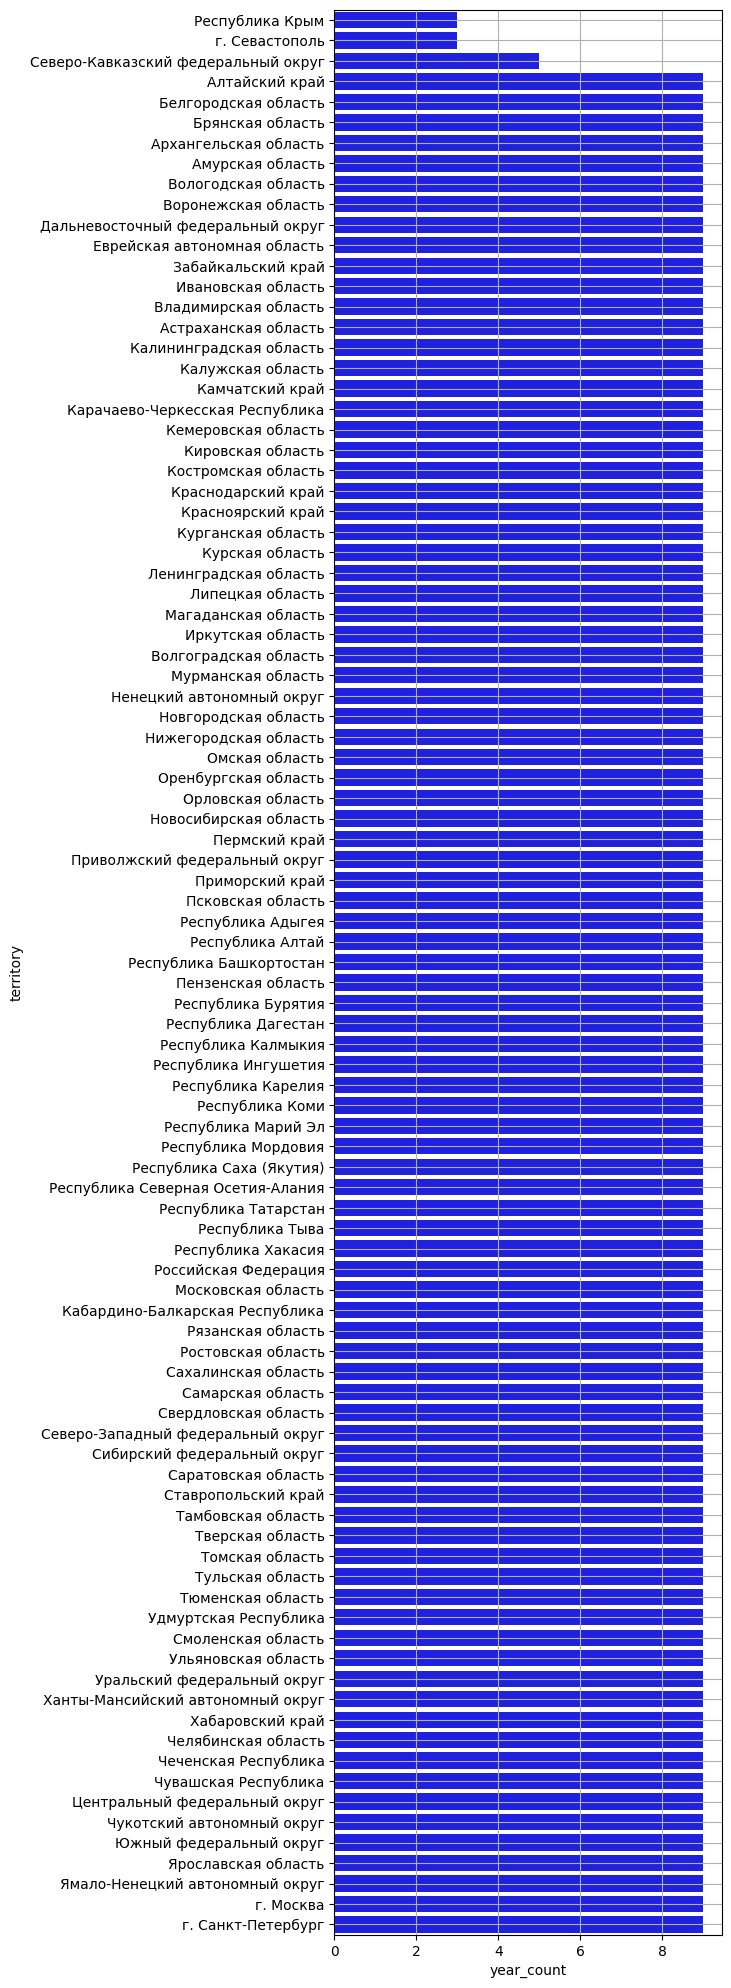

In [1243]:
plt.figure(figsize=(5, 25))
sns.barplot(data=df_year_count_correct, x = 'year_count',y = 'territory',orient = 'h', color = 'blue')
plt.grid()

In [1244]:
df.groupby('territory')['year'].unique().to_frame().tail(50)

,year
territory,
Республика Адыгея,"[2001, 2004, 2007, 2009, 2012, 2013, 2015, 201..."
Республика Алтай,"[2001, 2004, 2007, 2009, 2012, 2013, 2015, 201..."
Республика Башкортостан,"[2001, 2004, 2007, 2009, 2012, 2013, 2015, 201..."
Республика Бурятия,"[2001, 2004, 2007, 2009, 2012, 2013, 2015, 201..."
Республика Дагестан,"[2001, 2004, 2007, 2009, 2012, 2013, 2015, 201..."
Республика Ингушетия,"[2001, 2004, 2007, 2009, 2012, 2013, 2015, 201..."
Республика Калмыкия,"[2001, 2004, 2007, 2009, 2012, 2013, 2015, 201..."
Республика Карелия,"[2001, 2004, 2007, 2009, 2012, 2013, 2015, 201..."
Республика Коми,"[2001, 2004, 2007, 2009, 2012, 2013, 2015, 201..."


In [1245]:
# по результату выполненных проверок зафиксируем, что все субъекты РФ имеют данные по 8 годам, кроме:
# Республики Крым (вх. в состав РФ с 2014 года) / р. Севастополь (вх. в состав РФ с 2014 года) / Северо-Кавказского федерального округа (по причине образования в 2010 году).
# согласно инфрмации из свободных источников - на конец 2020 года в состав РФ входило - 85 субъектов (по нашим данным получилось 95 субъектов) - возможно в дальнейшем спарсить данные о субьектах РФ на 2020 год и сравнить с нашим DF.

In [1246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 830
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   territory                       830 non-null    object 
 1   num_economactivepopulation_all  828 non-null    float64
 2   employed_num_all                828 non-null    float64
 3   unemployed_num_all              828 non-null    float64
 4   eactivity_lvl                   828 non-null    float64
 5   employment_lvl                  828 non-null    float64
 6   unemployment_lvl                828 non-null    float64
 7   dis_unagegroup_to20             826 non-null    float64
 8   dis_unagegroup_20-29            828 non-null    float64
 9   dis_unagegroup_30-39            828 non-null    float64
 10  dis_unagegroup_40-49            828 non-null    float64
 11  dis_unagegroup_50-59            828 non-null    float64
 12  dis_unagegroup_60older          814 non-n

In [1247]:
df.isna().sum()

territory                          0
num_economactivepopulation_all     2
employed_num_all                   2
unemployed_num_all                 2
eactivity_lvl                      2
employment_lvl                     2
unemployment_lvl                   2
dis_unagegroup_to20                4
dis_unagegroup_20-29               2
dis_unagegroup_30-39               2
dis_unagegroup_40-49               2
dis_unagegroup_50-59               2
dis_unagegroup_60older            16
dis_emagegroup_to20                4
dis_emagegroup_20-29               2
dis_emagegroup_30-39               2
dis_emagegroup_40-49               2
dis_emagegroup_50-59               2
dis_emagegroup_60older             2
num_unagegroup_to20                3
num_unagegroup_20-29               2
num_unagegroup_30-39               2
num_unagegroup_40-49               2
num_unagegroup_50-59               2
num_unagegroup_60older            14
num_emagegroup_to20                3
num_emagegroup_20-29               2
n

In [1248]:
# проверяем пропуски, во всех ли столбцах они есть? и предпримем необходимые действия
df[pd.isnull(df).any(axis=1)]

,territory,num_economactivepopulation_all,employed_num_all,unemployed_num_all,eactivity_lvl,employment_lvl,unemployment_lvl,dis_unagegroup_to20,dis_unagegroup_20-29,dis_unagegroup_30-39,dis_unagegroup_40-49,dis_unagegroup_50-59,dis_unagegroup_60older,dis_emagegroup_to20,dis_emagegroup_20-29,dis_emagegroup_30-39,dis_emagegroup_40-49,dis_emagegroup_50-59,dis_emagegroup_60older,num_unagegroup_to20,num_unagegroup_20-29,num_unagegroup_30-39,num_unagegroup_40-49,num_unagegroup_50-59,num_unagegroup_60older,num_emagegroup_to20,num_emagegroup_20-29,num_emagegroup_30-39,num_emagegroup_40-49,num_emagegroup_50-59,num_emagegroup_60older,year
26,Калининградская область,446.3,403.6,42.8,60.2,54.5,9.6,5.5,34.0,18.9,25.1,16.5,NaN,0.9,18.8,29.2,29.2,16.8,5.2,2.4,14.6,8.1,10.7,7.1,0.0,3.6,75.9,117.9,117.9,67.8,21.0,2001
30,Псковская область,374.6,335.9,38.7,61.8,55.5,10.3,6.0,26.9,25.6,32.3,9.3,NaN,2.2,22.5,26.2,30.6,14.4,4.2,2.3,10.4,9.9,12.5,3.6,0.0,7.4,75.6,88.0,102.8,48.4,14.1,2001
35,Республика Ингушетия,145.4,94.7,50.8,54.9,35.8,34.9,0.7,38.0,24.1,33.0,3.8,0.4,NaN,19.8,45.6,27.4,5.0,2.3,0.4,19.3,12.2,16.8,1.9,0.2,0.0,18.8,43.2,25.9,4.7,2.2,2001
38,Карачаево-Черкесская Республика,184.8,150.5,34.3,58.8,47.9,18.6,2.1,36.9,36.2,16.8,8.0,NaN,3.5,19.7,25.7,30.3,13.0,7.7,0.7,12.7,12.4,5.8,2.7,0.0,5.3,29.6,38.7,45.6,19.6,11.6,2001
40,Чеченская Республика,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001
49,Республика Мордовия,432.1,386.9,45.2,61.9,55.4,10.5,2.7,36.8,30.3,21.9,8.3,NaN,1.7,20.4,28.3,33.3,13.2,3.2,1.2,16.6,13.7,9.9,3.8,0.0,6.6,78.9,109.5,128.8,51.1,12.4,2001
126,Республика Ингушетия,139.6,74.9,64.7,45.6,24.5,46.3,5.3,44.6,28.7,16.7,4.5,0.2,NaN,13.1,39.1,32.8,13.0,2.0,3.4,28.9,18.6,10.8,2.9,0.1,NaN,9.8,29.3,24.6,9.7,1.5,2004
131,Чеченская Республика,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
251,Республика Алтай,98.4,89.5,8.9,66.9,61.0,8.8,NaN,40.6,19.4,30.4,9.7,NaN,1.6,26.6,25.5,26.7,18.0,1.5,0.0,3.6,1.7,2.7,0.9,0.0,1.4,23.8,22.8,23.9,16.1,1.3,2007
468,Орловская область,394.1,371.1,23.0,65.6,61.8,5.8,2.4,31.1,24.3,26.8,15.4,NaN,0.7,22.3,25.2,24.1,22.7,5.0,0.6,7.1,5.6,6.2,3.5,NaN,2.6,82.6,93.5,89.5,84.4,18.6,2013


In [1249]:
# удаляем строки, в которых отсутствуют данные по всем ячейкам. Это строки 40 и 131 (Чеченская республика)
df.drop(labels = [40,131],axis = 0, inplace = True)

In [1250]:
# проверяем, как удалились строки 40 и 131
df[pd.isnull(df).any(axis=1)]

,territory,num_economactivepopulation_all,employed_num_all,unemployed_num_all,eactivity_lvl,employment_lvl,unemployment_lvl,dis_unagegroup_to20,dis_unagegroup_20-29,dis_unagegroup_30-39,dis_unagegroup_40-49,dis_unagegroup_50-59,dis_unagegroup_60older,dis_emagegroup_to20,dis_emagegroup_20-29,dis_emagegroup_30-39,dis_emagegroup_40-49,dis_emagegroup_50-59,dis_emagegroup_60older,num_unagegroup_to20,num_unagegroup_20-29,num_unagegroup_30-39,num_unagegroup_40-49,num_unagegroup_50-59,num_unagegroup_60older,num_emagegroup_to20,num_emagegroup_20-29,num_emagegroup_30-39,num_emagegroup_40-49,num_emagegroup_50-59,num_emagegroup_60older,year
26,Калининградская область,446.3,403.6,42.8,60.2,54.5,9.6,5.5,34.0,18.9,25.1,16.5,NaN,0.9,18.8,29.2,29.2,16.8,5.2,2.4,14.6,8.1,10.7,7.1,0.0,3.6,75.9,117.9,117.9,67.8,21.0,2001
30,Псковская область,374.6,335.9,38.7,61.8,55.5,10.3,6.0,26.9,25.6,32.3,9.3,NaN,2.2,22.5,26.2,30.6,14.4,4.2,2.3,10.4,9.9,12.5,3.6,0.0,7.4,75.6,88.0,102.8,48.4,14.1,2001
35,Республика Ингушетия,145.4,94.7,50.8,54.9,35.8,34.9,0.7,38.0,24.1,33.0,3.8,0.4,NaN,19.8,45.6,27.4,5.0,2.3,0.4,19.3,12.2,16.8,1.9,0.2,0.0,18.8,43.2,25.9,4.7,2.2,2001
38,Карачаево-Черкесская Республика,184.8,150.5,34.3,58.8,47.9,18.6,2.1,36.9,36.2,16.8,8.0,NaN,3.5,19.7,25.7,30.3,13.0,7.7,0.7,12.7,12.4,5.8,2.7,0.0,5.3,29.6,38.7,45.6,19.6,11.6,2001
49,Республика Мордовия,432.1,386.9,45.2,61.9,55.4,10.5,2.7,36.8,30.3,21.9,8.3,NaN,1.7,20.4,28.3,33.3,13.2,3.2,1.2,16.6,13.7,9.9,3.8,0.0,6.6,78.9,109.5,128.8,51.1,12.4,2001
126,Республика Ингушетия,139.6,74.9,64.7,45.6,24.5,46.3,5.3,44.6,28.7,16.7,4.5,0.2,NaN,13.1,39.1,32.8,13.0,2.0,3.4,28.9,18.6,10.8,2.9,0.1,NaN,9.8,29.3,24.6,9.7,1.5,2004
251,Республика Алтай,98.4,89.5,8.9,66.9,61.0,8.8,NaN,40.6,19.4,30.4,9.7,NaN,1.6,26.6,25.5,26.7,18.0,1.5,0.0,3.6,1.7,2.7,0.9,0.0,1.4,23.8,22.8,23.9,16.1,1.3,2007
468,Орловская область,394.1,371.1,23.0,65.6,61.8,5.8,2.4,31.1,24.3,26.8,15.4,NaN,0.7,22.3,25.2,24.1,22.7,5.0,0.6,7.1,5.6,6.2,3.5,NaN,2.6,82.6,93.5,89.5,84.4,18.6,2013
471,Тамбовская область,533.2,508.6,24.6,63.7,60.8,4.6,2.3,29.1,23.7,25.5,19.3,NaN,0.5,20.9,25.1,25.4,24.2,4.0,0.6,7.2,5.8,6.3,4.8,NaN,2.4,106.2,127.5,129.1,123.2,20.1,2013
523,Ямало-Ненецкий автономный округ,324.8,314.5,10.3,77.0,74.6,3.2,6.2,54.4,17.1,8.6,13.8,NaN,0.2,21.3,30.0,27.1,20.0,1.4,0.6,5.6,1.8,0.9,1.4,NaN,0.7,66.9,94.4,85.3,62.8,4.4,2013


In [1251]:
# проверим наличие пропуском после удаления строк (40, 131)
df.isnull().sum()

territory                          0
num_economactivepopulation_all     0
employed_num_all                   0
unemployed_num_all                 0
eactivity_lvl                      0
employment_lvl                     0
unemployment_lvl                   0
dis_unagegroup_to20                2
dis_unagegroup_20-29               0
dis_unagegroup_30-39               0
dis_unagegroup_40-49               0
dis_unagegroup_50-59               0
dis_unagegroup_60older            14
dis_emagegroup_to20                2
dis_emagegroup_20-29               0
dis_emagegroup_30-39               0
dis_emagegroup_40-49               0
dis_emagegroup_50-59               0
dis_emagegroup_60older             0
num_unagegroup_to20                1
num_unagegroup_20-29               0
num_unagegroup_30-39               0
num_unagegroup_40-49               0
num_unagegroup_50-59               0
num_unagegroup_60older            12
num_emagegroup_to20                1
num_emagegroup_20-29               0
n

In [1252]:
# выведем индексы, они нам понадобятся в дальнейшей работе
data_index = df[pd.isnull(df).any(axis=1)]
print(data_index.index)

Index([ 26,  30,  35,  38,  49, 126, 251, 468, 471, 523, 528, 547, 655, 676,
       683, 687, 752, 806, 826, 830],
      dtype='int64')


In [1253]:
df

,territory,num_economactivepopulation_all,employed_num_all,unemployed_num_all,eactivity_lvl,employment_lvl,unemployment_lvl,dis_unagegroup_to20,dis_unagegroup_20-29,dis_unagegroup_30-39,dis_unagegroup_40-49,dis_unagegroup_50-59,dis_unagegroup_60older,dis_emagegroup_to20,dis_emagegroup_20-29,dis_emagegroup_30-39,dis_emagegroup_40-49,dis_emagegroup_50-59,dis_emagegroup_60older,num_unagegroup_to20,num_unagegroup_20-29,num_unagegroup_30-39,num_unagegroup_40-49,num_unagegroup_50-59,num_unagegroup_60older,num_emagegroup_to20,num_emagegroup_20-29,num_emagegroup_30-39,num_emagegroup_40-49,num_emagegroup_50-59,num_emagegroup_60older,year
0,Российская Федерация,70816.1,64400.1,6416.0,64.2,58.4,9.1,8.2,30.7,24.8,24.2,9.7,2.4,2.2,21.8,26.5,30.7,14.6,4.4,526.1,1969.7,1591.2,1552.7,622.4,154.0,1416.8,14039.2,17066.0,19770.8,9402.4,2833.6,2001
1,Центральный федеральный округ,18337.9,17181.9,1156.0,64.6,60.5,6.3,7.9,29.8,24.6,24.4,10.4,2.9,1.7,20.1,25.9,30.6,16.2,5.5,91.3,344.5,284.4,282.1,120.2,33.5,292.1,3453.6,4450.1,5257.7,2783.5,945.0,2001
2,Белгородская область,737.9,689.6,48.3,65.4,61.1,6.5,6.0,43.4,17.2,19.4,8.9,5.0,1.9,21.5,27.1,30.4,12.4,6.7,2.9,21.0,8.3,9.4,4.3,2.4,13.1,148.3,186.9,209.6,85.5,46.2,2001
3,Брянская область,653.5,588.1,65.3,61.0,54.9,10.0,5.9,33.3,28.0,23.6,8.2,1.0,2.8,23.1,27.1,30.7,12.4,3.9,3.9,21.7,18.3,15.4,5.4,0.7,16.5,135.9,159.4,180.5,72.9,22.9,2001
4,Владимирская область,808.9,728.4,80.5,65.4,58.9,9.9,13.2,32.4,21.4,25.0,5.0,3.1,2.3,21.6,25.7,30.4,15.4,4.6,10.6,26.1,17.2,20.1,4.0,2.5,16.8,157.3,187.2,221.4,112.2,33.5,2001
5,Воронежская область,1116.6,1009.0,107.6,60.1,54.3,9.6,3.4,23.6,33.2,24.8,10.3,4.7,1.1,21.3,25.4,30.6,16.9,4.6,3.7,25.4,35.7,26.7,11.1,5.1,11.1,214.9,256.3,308.8,170.5,46.4,2001
6,Ивановская область,588.3,555.2,33.1,62.6,59.1,5.6,6.5,35.0,28.3,19.6,9.1,1.5,3.0,22.6,26.2,30.1,13.9,4.2,2.2,11.6,9.4,6.5,3.0,0.5,16.7,125.5,145.5,167.1,77.2,23.3,2001
7,Калужская область,550.3,517.2,33.1,66.3,62.3,6.0,4.2,28.4,30.2,26.8,6.8,3.6,3.2,20.2,25.3,29.8,15.2,6.3,1.4,9.4,10.0,8.9,2.3,1.2,16.6,104.5,130.9,154.1,78.6,32.6,2001
8,Костромская область,380.1,357.4,22.8,64.2,60.4,6.0,10.2,33.0,19.7,18.2,18.0,0.9,2.4,22.8,26.1,32.2,13.2,3.3,2.3,7.5,4.5,4.1,4.1,0.2,8.6,81.5,93.3,115.1,47.2,11.8,2001
9,Курская область,622.5,557.5,65.0,63.1,56.5,10.4,10.0,33.8,24.4,25.0,5.6,1.3,1.5,21.1,26.2,31.5,14.8,4.9,6.5,22.0,15.9,16.3,3.6,0.8,8.4,117.6,146.1,175.6,82.5,27.3,2001


In [1254]:
# Описание данных:

# territory - наименование территории по ОКАТО 
# num_economactivepopulation_all - численность экономически активного населения - всего 
# employed_num_all - занятые в экономике 
# unemployed_num_all - безработные 
# eactivity_lvl - уровень экономической активности 
# employment_lvl - уровень занятости 
# unemployment_lvl - уровень безработицы 
# dis_unagegroup_to20 - распределение безработных в возрасте до 20 лет по регионам РФ 
# dis_unagegroup_20-29 - распределение безработных в возрасте от 20 до 29 лет по регионам РФ 
# dis_unagegroup_30-39 - распределение безработных в возрасте от 30 до 39 лет по регионам РФ 
# dis_unagegroup_40-49 - распределение безработных в возрасте от 40 до 49 лет по регионам РФ 
# dis_unagegroup_50-59 - распределение безработных в возрасте от 50 до 59 лет по регионам РФ 
# dis_unagegroup_60older - распределение безработных в возрасте 60 и более лет по регионам РФ 
# dis_emagegroup_to20 - распределение занятых в экономике в возрасте до 20 лет по регионам РФ 
# dis_emagegroup_20-29 - распределение занятых в экономике в возрасте от 20 до 29 лет по регионам РФ 
# dis_emagegroup_30-39 - распределение занятых в экономике в возрасте от 30 до 39 лет по регионам РФ 
# dis_emagegroup_40-49 - распределение занятых в экономике в возрасте от 40 до 49 лет по регионам РФ 
# dis_emagegroup_50-59 - распределение занятых в экономике в возрасте от 50 до 59 лет по регионам РФ 
# dis_emagegroup_60older - распределение занятых в экономике в возрасте 60 и более лет по регионам РФ 
# num_unagegroup_to20 - численность безработных в возрасте до 20 лет по регионам РФ 
# num_unagegroup_20-29 - численность безработных в возрасте от 20 до 29 лет по регионам РФ 
# num_unagegroup_30-39 - численность безработных в возрасте от 30 до 39 лет по регионам РФ 
# num_unagegroup_40-49 - численность безработных в возрасте от 40 до 49 лет по регионам РФ 
# num_unagegroup_50-59 - численность безработных в возрасте от 50 до 59 лет по регионам РФ 
# num_unagegroup_60older - численность безработных в возрасте 60 и более лет по регионам РФ 
# num_emagegroup_to20 - численность занятых в экономике регионов РФ в возрасте до 20 лет 
# num_emagegroup_20-29 - численность занятых в экономике регионов РФ в возрасте от 20 до 29 лет 
# num_emagegroup_30-39 - численность занятых в экономике регионов РФ в возрасте от 30 до 39 лет 
# num_emagegroup_40-49 - численность занятых в экономике регионов РФ в возрасте от 40 до 49 лет 
# num_emagegroup_50-59 - численность занятых в экономике регионов РФ в возрасте от 50 до 59 лет 
# num_emagegroup_60older - численность занятых в экономике регионов РФ в возрасте 60 и более лет 
# year - отчетный год

In [1256]:
# создадим функцию для расчета значений по нескольким столбцам
def data_dis_unage_emage (index):
    data_dis_unage = df.loc[index, ['dis_unagegroup_to20', 'dis_unagegroup_20-29', 
                                      'dis_unagegroup_30-39', 'dis_unagegroup_40-49', 
                                      'dis_unagegroup_50-59', 'dis_unagegroup_60older']].sum()
    data_dis_emage = df.loc[index, ['dis_emagegroup_to20', 'dis_emagegroup_20-29', 
                                      'dis_emagegroup_30-39', 'dis_emagegroup_40-49', 
                                      'dis_emagegroup_50-59', 'dis_emagegroup_60older']].sum()
    
    # выведем значение столбца с наименованием территорий
    name = df.loc[index, 'territory']
    
    print(name)
    print('Распределение безработных -', data_dis_unage.round(), '%')
    print('Распределение занятых -', data_dis_emage.round(), '%')
    print()

# пройдемся циклом по всем нашим строкам со значением NaN в рассматриваемых столбцах
for i in data_index.index:
    data_dis_unage_emage(i)

Калининградская область
Распределение безработных - 100.0 %
Распределение занятых - 100.0 %

Псковская область
Распределение безработных - 100.0 %
Распределение занятых - 100.0 %

Республика Ингушетия
Распределение безработных - 100.0 %
Распределение занятых - 100.0 %

Карачаево-Черкесская Республика
Распределение безработных - 100.0 %
Распределение занятых - 100.0 %

Республика Мордовия
Распределение безработных - 100.0 %
Распределение занятых - 100.0 %

Республика Ингушетия
Распределение безработных - 100.0 %
Распределение занятых - 100.0 %

Республика Алтай
Распределение безработных - 100.0 %
Распределение занятых - 100.0 %

Орловская область
Распределение безработных - 100.0 %
Распределение занятых - 100.0 %

Тамбовская область
Распределение безработных - 100.0 %
Распределение занятых - 100.0 %

Ямало-Ненецкий автономный округ
Распределение безработных - 100.0 %
Распределение занятых - 100.0 %

Республика Тыва
Распределение безработных - 100.0 %
Распределение занятых - 100.0 %

Чук